### Import Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from seaborn.utils import ci

### Create DataFrames 

In [ ]:
dailyCovidCases = pd.read_csv("./data/case-data-by-day.csv")
dailyVaccinations = pd.read_csv("./data/vaccine-doses-by-day.csv")
dailyRidership = pd.read_csv("./data/MTA_Daily_Ridership_Data__Beginning_2020.csv")

### EDA

In [ ]:
dailyRidership["Date"].dtype

In [ ]:
dailyRidership["Date"] = pd.to_datetime(dailyRidership["Date"])
dailyVaccinations["Date"] = pd.to_datetime(dailyVaccinations["DATE"])
dailyCovidCases["Date"] = pd.to_datetime(dailyCovidCases["date_of_interest"])


#### MTA ridership was sorted in most recent date first 

In [ ]:
dailyRidership.sort_values(by="Date",inplace=True,ascending=True)
dailyRidership.reset_index(drop=True, inplace=True)

#### Original ridership graph - no changes

In [ ]:
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3=sns.lineplot(x=dailyRidership["Date"].dt.strftime('%m-%d-%Y'), 
                  y=dailyRidership["Subways: Total Estimated Ridership"], 
                  palette=["r"]
                  )
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.ticklabel_format(axis='y', style='plain')


for index, tickLabel in enumerate(ax3.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax3.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
ax3.grid(True,axis='y')

### Remove Weekend data

In [7]:
riders_df = dailyRidership[['Date','Subways: Total Estimated Ridership']]

In [ ]:
riders_df_filtered = riders_df[~riders_df['Date'].dt.weekday.isin([5,6])]
riders_df_filtered.reset_index(drop=True, inplace=True)
riders_df_filtered.info()


In [ ]:
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3=sns.lineplot(x=riders_df_filtered["Date"].dt.strftime('%m-%d-%Y'), 
                  y=riders_df_filtered["Subways: Total Estimated Ridership"], 
                  palette=["r"]
                  )
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.ticklabel_format(axis='y', style='plain')


for index, tickLabel in enumerate(ax3.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax3.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
ax3.grid(True,axis='y')

### 7 day rolling average

In [8]:
riders_avg = riders_df.copy()


In [ ]:
riders_avg.head()

In [9]:
riders_avg["7 day avg"] = riders_avg["Subways: Total Estimated Ridership"].rolling(window=7).mean()

In [ ]:
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3=sns.lineplot(x=riders_avg["Date"], 
                  y=riders_avg["7 day avg"], 
                #   color='red'
                  )
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.ticklabel_format(axis='y', style='plain')
ax3.set_ylabel('Ridership (7 Day Avg)')
ax3.set_title('Ridership over Time', fontsize=16)


# for index, tickLabel in enumerate(ax3.get_xticklabels()):
#     if index%40==0:
#         tickLabel.set_visible(True)
#     else:
#         tickLabel.set_visible(False)
        
# for index, tick in enumerate(ax3.get_xticklines()):
#     if index%40==0:
#         tick.set_visible(True)
#     else:
#         tick.set_visible(False)
        
ax3.grid(True,axis='y')

# ax3.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

### 7 day avg for cases

In [ ]:
cases_df = dailyCovidCases[['Date', 'CASE_COUNT']]

cases_df['7 day avg'] = cases_df['CASE_COUNT'].rolling(window=7).mean()
cases_df.head(10)

In [ ]:
fig1, ax1 = plt.subplots(figsize=(14,7))
ax1 = sns.lineplot(x=cases_df["Date"].dt.strftime('%m-%d-%Y'), 
                  y=cases_df["7 day avg"], 
                  color='orangered',
                  )

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.ticklabel_format(axis='y', style='plain')
ax1.set_ylabel('Case Count (7 Day Avg)')
ax1.set_title('Cases over Time', fontsize=16)

for index, tickLabel in enumerate(ax1.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax1.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax1.grid(True,axis='y')

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot(x=cases_df["Date"].dt.strftime('%m-%d-%Y'), 
                  y=cases_df["7 day avg"], 
                  color='red',
                  )
ax5 = plt.gca()
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
ax5.ticklabel_format(axis='y', style='plain')
ax5.set_xlabel('Date', fontsize=12)
ax5.set_ylabel('Case Count (7 Day Avg)', fontsize=12, color="red")
ax5.set_title('Ridership and Cases over Time', fontsize=16)

for index, tickLabel in enumerate(ax5.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax5.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax5.grid(True,axis='y')

ax6 = ax5.twinx()
sns.lineplot(x=riders_avg["Date"].dt.strftime('%m-%d-%Y'), y=riders_avg["7 day avg"], 
              ax=ax6, 
            #   join=True, 
            #   scale=0.3, 
              color='blue'
              )
ax6.ticklabel_format(axis='y', style='plain')
ax6.set_ylabel('Ridership (7 Day Avg)', fontsize=12, color="blue")

plt.show()

#### original graph - move higher to show learning frm raw data vs 7 day avg

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,7))
ax1 = sns.barplot(x=dailyCovidCases["Date"].dt.strftime('%m-%d-%Y'), 
                  y=dailyCovidCases["CASE_COUNT"], 
                  palette=["r"]
                  )
ax1.set_title('Daily Case Count vs Daily Ridership', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Daily Case Count', fontsize=16, color="tab:red")


ax2 = ax1.twinx()
ax2 = sns.lineplot(x=dailyRidership["Date"].dt.strftime('%m-%d-%Y'),
                    y=dailyRidership["Subways: Total Estimated Ridership"], 
                    color="blue",
                    # join=True,
                    # scale=0.3
                    )
ax2.set_ylabel('Daily Ridership', fontsize=16, color="blue")

for index, tick in enumerate(ax1.get_xticklabels()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
for index, tick in enumerate(ax3.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
ax3.grid(True,axis='y')

## Vaccines over TIme with ridership NEED TO FIX


In [ ]:
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3=sns.lineplot(x=dailyVaccinations["Date"].dt.strftime('%m-%d-%Y'), 
                  y=dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"], 
                  palette=["r"]
                  )
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.ticklabel_format(axis='y', style='plain')


for index, tickLabel in enumerate(ax3.get_xticklabels()):
    if index%20==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax3.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        

In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot(x=riders_avg["Date"].dt.strftime('%m-%d-%Y'), 
                  y=riders_avg["7 day avg"], 
                  color='red',
                  )
ax5 = plt.gca()
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
ax5.ticklabel_format(axis='y', style='plain')
ax5.set_xlabel('Date', fontsize=12)
ax5.set_ylabel('Case Count (7 Day Avg)', fontsize=12, color="red")
ax5.set_title('Ridership and Cases over Time', fontsize=16)

for index, tickLabel in enumerate(ax5.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax5.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax5.grid(True,axis='y')

ax6 = ax5.twinx()
sns.lineplot(x=riders_avg["Date"].dt.strftime('%m-%d-%Y'), y=dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"], 
              ax=ax6, 
            #   join=True, 
            #   scale=0.3, 
              color='blue'
              )
ax6.ticklabel_format(axis='y', style='plain')
ax6.set_ylabel('Ridership (7 Day Avg)', fontsize=12, color="blue")

plt.show()

### Fixing Vaccination df

In [11]:
riders_vaccines = riders_avg.copy()
riders_vaccines.head(10)


,Date,Subways: Total Estimated Ridership,7 day avg
0,2020-03-01,2212965,NaN
1,2020-03-02,5329915,NaN
2,2020-03-03,5481103,NaN
3,2020-03-04,5498809,NaN
4,2020-03-05,5496453,NaN
5,2020-03-06,5189447,NaN
6,2020-03-07,2814637,4.574761e+06
7,2020-03-08,2120656,4.561574e+06
8,2020-03-09,4973513,4.510660e+06
9,2020-03-10,4867818,4.423048e+06


In [ ]:
riders_vaccines.drop(columns="Subways: Total Estimated Ridership",inplace=True)

In [ ]:
riders_vaccines.head()

In [12]:
rider_filter = riders_vaccines[riders_vaccines["Date"] >= dailyVaccinations["Date"].min()]


In [13]:
rider_filter.head()

,Date,Subways: Total Estimated Ridership,7 day avg
288,2020-12-14,1584089,1.482475e+06
289,2020-12-15,1783388,1.517117e+06
290,2020-12-16,1569079,1.498139e+06
291,2020-12-17,1079818,1.400779e+06
292,2020-12-18,1735664,1.393547e+06


In [ ]:
plt.figure(figsize=(17,7))
sns.lineplot(x=rider_filter["Date"].dt.strftime('%m-%d-%Y'), 
                  y=rider_filter["7 day avg"], 
                  color='red',
                  )
ax5 = plt.gca()
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
ax5.ticklabel_format(axis='y', style='plain')
ax5.set_xlabel('Date', fontsize=12)
ax5.set_ylabel('Ridership (7 Day Avg)', fontsize=12, color="red")
ax5.set_title('Vaccines and Ridership over Time', fontsize=16)

for index, tickLabel in enumerate(ax5.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax5.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax5.grid(True,axis='y')

ax6 = ax5.twinx()
sns.lineplot(x=dailyVaccinations["Date"].dt.strftime('%m-%d-%Y'), y=dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"], 
              ax=ax6, 
            #   join=True, 
            #   scale=0.3, 
              color='blue'
              )
ax6.ticklabel_format(axis='y', style='plain')
ax6.set_ylabel('Vaccinatins (7 Day Avg)', fontsize=12, color="blue")

plt.show()

## Corr Plots

In [18]:
corr_df = pd.DataFrame()
corr_df["dailyRiders"] = rider_filter["7 day avg"]
corr_df["cases"] = dailyCovidCases["CASE_COUNT_7DAY_AVG"]
corr_df["vaccines"] = dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"]

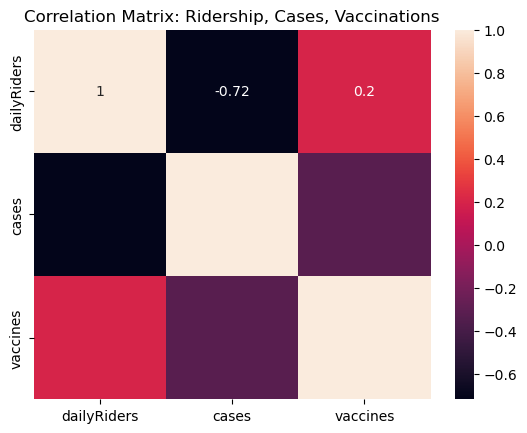

In [26]:
corrPlot = sns.heatmap(corr_df.corr(), annot = True, robust=True)
corrPlot.set_title("Correlation Matrix: Ridership, Cases, Vaccinations")

plt.show()

In [29]:
rider_filter["7 day avg"].corr(dailyCovidCases["CASE_COUNT_7DAY_AVG"]).round(2)

-0.72

In [27]:
rider_filter["7 day avg"].corr(dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"]).round(2)

0.2

In [28]:
dailyCovidCases["CASE_COUNT_7DAY_AVG"].corr(dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"]).round(2)

-0.29

In [ ]:
#Run linear regression and plot for each Cases/Ridership and Vaccinations/Ridership
slope,intercept, r_value, p_value, std_err = stats.linregress(
    dailyCovidCases.loc[1:,"CASE_COUNT"],
    dailyRidership["Subways: Total Estimated Ridership"]
    )
plt.scatter(dailyCovidCases.loc[1:,"CASE_COUNT"],dailyRidership["Subways: Total Estimated Ridership"])
plt.plot(dailyCovidCases.loc[1:,"CASE_COUNT"], 
         slope*dailyCovidCases.loc[1:,"CASE_COUNT"] + intercept, color='red', label='Linear Regression')
plt.show()

<Axes: xlabel='CASE_COUNT', ylabel='Subways: Total Estimated Ridership'>

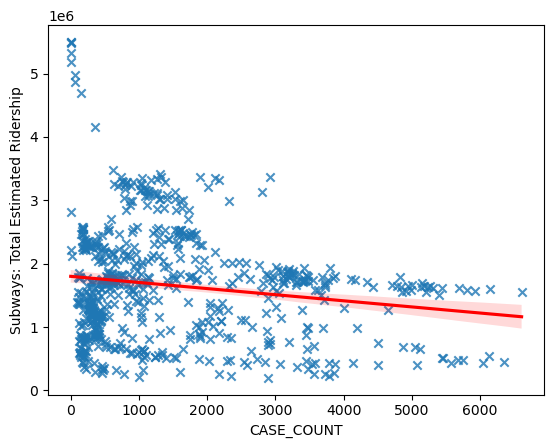

In [16]:
sns.regplot(
    x=dailyCovidCases.loc[1:,"CASE_COUNT"],
    y=dailyRidership["Subways: Total Estimated Ridership"],
    line_kws=dict(color="r"),
    marker='x'
    )